# Predicting heart disease using machine learning
This notebook looks into various Python-based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting whether or
mot someone has heart disease based on their medical attributes

We're going to take the following approach
1. Problem identification
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have
>heart disease?

## 2. Data

The orginal data came from Cleavland data from the Cleavland data from UCI Machine Learning Repository:https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of in available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disaese during the proof of concept , we'll pursue the project.

## 4. Features

This is where tou'll get different information about each of the features in your data.

**Create data dictionary**

1.	age - age in years
2.	sex - (1 = male; 0 = female)
3.	cp - chest pain type
•	0: Typical angina: chest pain related decrease blood supply to the heart
•	1: Atypical angina: chest pain not related to heart
•	2: Non-anginal pain: typically esophageal spasms (non heart related)
•	3: Asymptomatic: chest pain not showing signs of disease
4.	trestbps - resting blood pressure (in mm Hg on admission to the hospital)
•	anything above 130-140 is typically cause for concern
5.	chol - serum cholestoral in mg/dl
•	serum = LDL + HDL + .2 * triglycerides
•	above 200 is cause for concern
6.	fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
•	'>126' mg/dL signals diabetes
7.	restecg - resting electrocardiographic results
•	0: Nothing to note
•	1: ST-T Wave abnormality
	can range from mild symptoms to severe problems
	signals non-normal heart beat
•	2: Possible or definite left ventricular hypertrophy
	Enlarged heart's main pumping chamber
8.	thalach - maximum heart rate achieved
9.	exang - exercise induced angina (1 = yes; 0 = no)
10.	oldpeak - ST depression induced by exercise relative to rest
•	looks at stress of heart during excercise
•	unhealthy heart will stress more
11.	slope - the slope of the peak exercise ST segment
•	0: Upsloping: better heart rate with excercise (uncommon)
•	1: Flatsloping: minimal change (typical healthy heart)
•	2: Downslopins: signs of unhealthy heart
12.	ca - number of major vessels (0-3) colored by flourosopy
•	colored vessel means the doctor can see the blood passing through
•	the more blood movement the better (no clots)
13.	thal - thalium stress result
•	1,3: normal
•	6: fixed defect: used to be defect but ok now
•	7: reversable defect: no proper blood movement when excercising
14.	target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.



In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis and plotting libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want the plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

    

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, columns)


(303, 14)

## Data Exploration (exploratory dara analysis)

The goal here is to find out more about the data and become a subject matter export on the
dataset you're working

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the fata and how can you deal with it?
4. Whare are the outliers and why should you care about them
5. How can you add,change and remove features to get more out of the data?

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [57]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

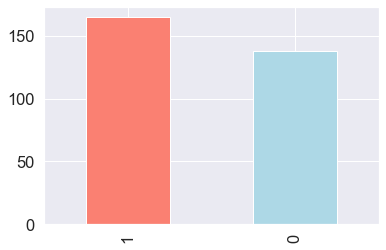

In [58]:
df['target'].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [59]:
# Are there any mssing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
# Describe
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
# find columns correlation to each other
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Heart Disease Frequency according to Sex


In [62]:
df['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

In [63]:
# compare target column with sex column
pd.crosstab(df['target'],df['sex'])



sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

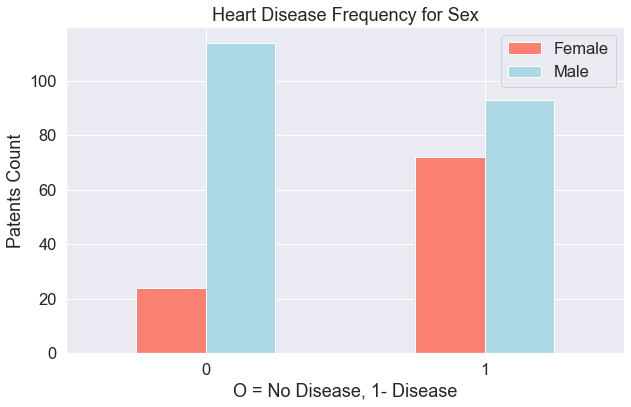

In [64]:
# Create a plot of crosstab
pd.crosstab(df['target'],df['sex']).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("O = No Disease, 1- Disease")
plt.ylabel("Patents Count")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

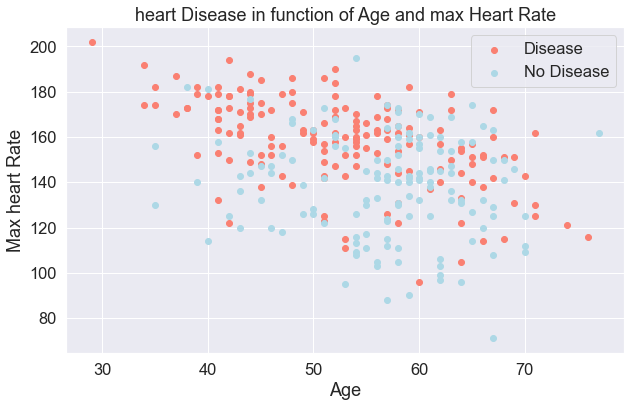

In [65]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df['age'][df["target"] == 1],
            df['thalach'][df['target']==1],
            c="salmon")
# Scatter with negative examples

plt.scatter(df['age'][df["target"] == 0],
            df['thalach'][df['target']==0],
            c="lightblue")

# Add some help full info
plt.title("heart Disease in function of Age and max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart Rate")
plt.legend(["Disease","No Disease"])

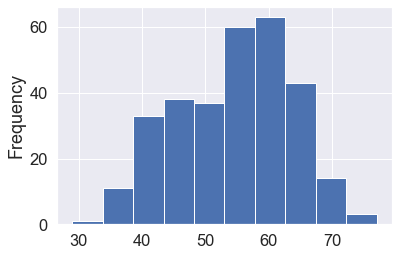

In [66]:
# check the distribution of the Age column
df["age"].plot.hist();

### Heart Disease Frequency per Chest Type
3. cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-Anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [67]:
# cross tab between cp and target
pd.crosstab(df['cp'],df['target'])


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

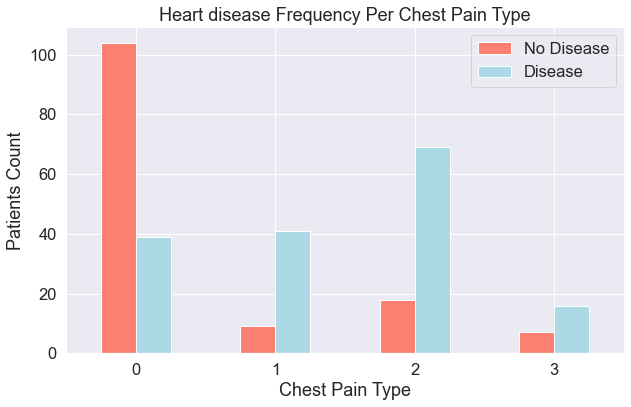

In [68]:
# Make the crosstab more visual
pd.crosstab(df['cp'],df['target']).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["salmon","lightblue"])
# Add some communication
plt.title("Heart disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Patients Count")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)


In [69]:
# correlation between independent variables and dependent
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


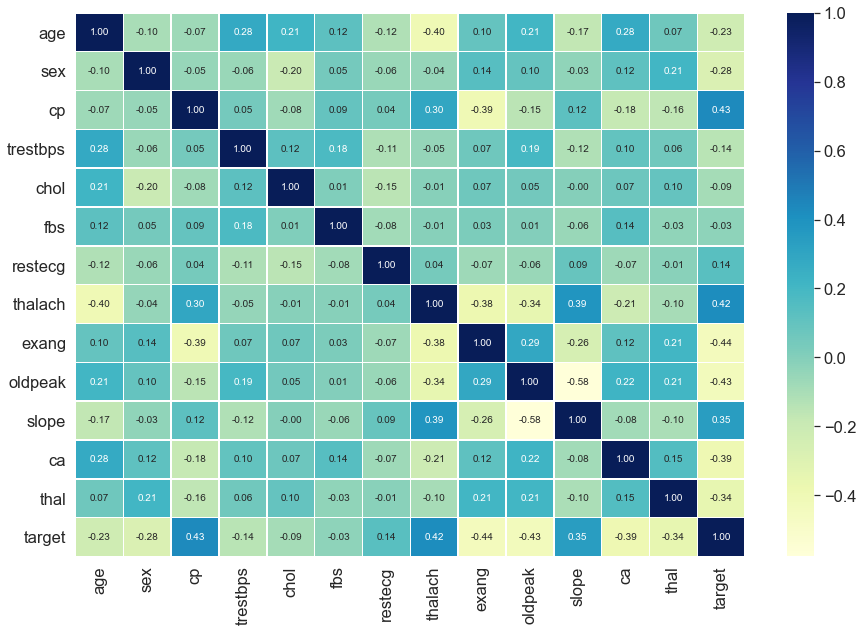

In [70]:
# Make it the correlation More visual
corr_matrix= df.corr()
fif,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")



In [71]:
# negative correlation to the target values
# 9.	exang - exercise induced angina (1 = yes; 0 = no)
pd.crosstab(df['exang'],df['target'])


target,0,1
exang,,
0,62,142
1,76,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

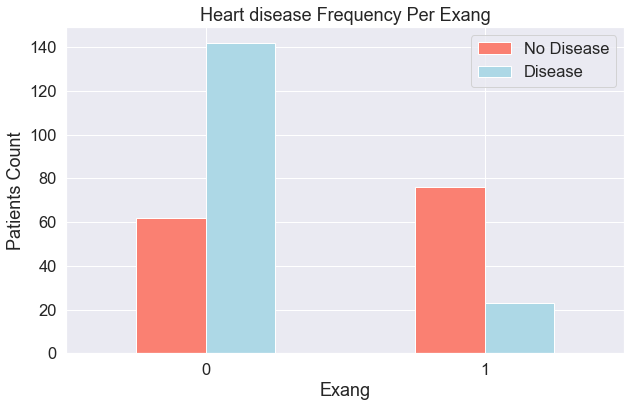

In [72]:
# Plot the graph
pd.crosstab(df['exang'],df['target']).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["salmon","lightblue"])

# Add some communication
plt.title("Heart disease Frequency Per Exang")
plt.xlabel("Exang")
plt.ylabel("Patients Count")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

### Modelling


In [73]:
# Split data into X and y
X = df.drop("target", axis=1)
y= df['target']

In [74]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [76]:
# Split data into Train and Test Set
#np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 stratify=y,
                                                 random_state=42)

In [77]:
# Check the y split value counts for y_train
y_train.value_counts()

1    132
0    110
Name: target, dtype: int64

In [78]:
# Check the y split value counts for y_test
y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

Now we have got our data to split into training and test sets,it's time to build
a machine learning model

We'll train it (find the pattens) on the training set.
And we'll test it (use the patterns) on the test set.
We're going to try 3 different machine learning models

1. Logistic Regression
2. K-Nearest Neighbour
3. Random forest Classifier

In [79]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Fit and evalutes given machine learning models
    :param models: a dict of differnt Scikit-Learn machine learning models
    :param X_train: traning data (no labels)
    :param X_text: testing data (no labels)
    :param y_train: training labels
    :param y_test: test labels
    :return:
    '''
    # Set random seed
    np.random.seed(42)
    # make a dictionary to keep models scores
    model_scores ={}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append it ts score to model_scores
        model_scores[name]= model.score(X_test,y_test)

    return model_scores

In [80]:
# Call the Fit and score function for the models

model_scores = fit_and_score(models,
                             X_train,
                             X_test,
                             y_train,
                             y_test)
model_scores

d:\google drive\masters\machine learning and data science zero to mastery\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

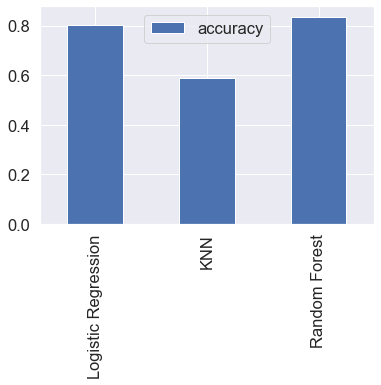

In [81]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

Now we have the baseline model... and we know the first predictions aren't always
what we should based out the next step off.
What should we do?

Lets look at the following:
* Hyper Parameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning By HAND

In [82]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the training score list
    train_scores.append(knn.score(X_train,y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [83]:
train_scores



[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7727272727272727,
 0.7520661157024794,
 0.7520661157024794,
 0.7479338842975206,
 0.7355371900826446,
 0.743801652892562,
 0.743801652892562,
 0.7355371900826446,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.71900826446281,
 0.7107438016528925,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165]

In [84]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836]

In [85]:
# view train and test scores in a data frame
train_test_df =pd.DataFrame({"Train scores":train_scores,
                             "Test Scores":test_scores},index=range(1,21))


<AxesSubplot:>

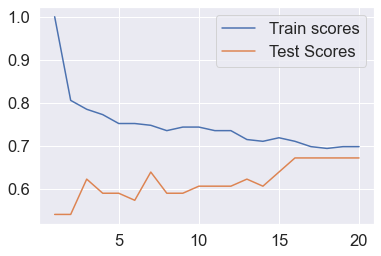

In [86]:
# plot from the data frame
train_test_df.plot()



Maximum KNN score on the test data: 67.21%


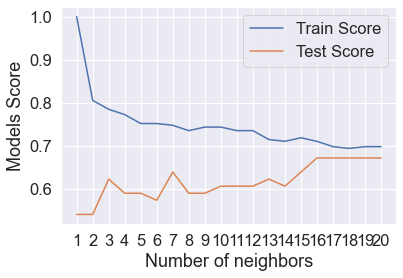

In [87]:
# Plot using plt
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Models Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomSearchCV
Search on google "how to turn hyperparameter for logistic regression"

We're going to tune:
* LogisticRegression
* RandomForestClassifier
..Using RandomSearchCV

In [88]:
# Create a hyperparametr grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid fo RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of the models, let's tune them using
RandomizedSearchCv

In [89]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [90]:
# check the Best parameters found for the RandomSearchCV
rs_log_reg.best_params_



{'solver': 'liblinear', 'C': 0.23357214690901212}

In [91]:
# Evaluate our test score
rs_log_reg.score(X_test,y_test)



0.7868852459016393

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...




In [92]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model for RandomForestClassiffier
rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [93]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [94]:
# Check the Score of the RandomForestClassifier on test data
rs_rf.score(X_test,y_test)




0.819672131147541

## Hyperparameter Turning with GridSearchCV

Since our LogisticRegression model provides the scores so far, we'll try and improve them
again using GridSearchCv


In [95]:
# Different hyperparameter for our LogoisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup Grid hyperparameter Search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter Search model
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [96]:
# Find the best params of the Logistic Regression GridSerach
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [97]:
# Evaluate the test data with GribSearch CV
gs_log_reg.score(X_test,y_test)

0.7868852459016393

Evaluating our tuned machine learning classifier, beyond accuracy

* RIC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 - score

...and would be great if cross-validation was used where possible

To make comparison and evaluate our train model , first we need to make predictions.

In [98]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)



In [99]:
y_preds



array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

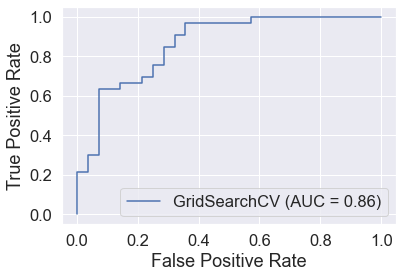

In [100]:
# Plot Roc curve and calculate and calculate AUC matric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [101]:
# confusion Matrix
print(confusion_matrix(y_test,y_preds))



[[19  9]
 [ 4 29]]


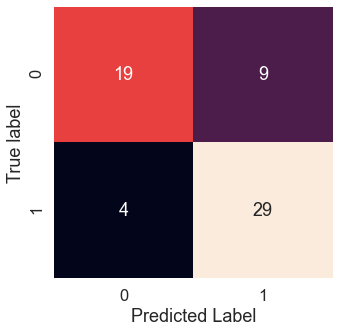

In [102]:
# Create a confusion matrix plot function
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''

    Plots a nice looking confusion matrix using seaborn's heatmap
    '''
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

## Plotting Confusion matrix using Scikit-Learn Plot

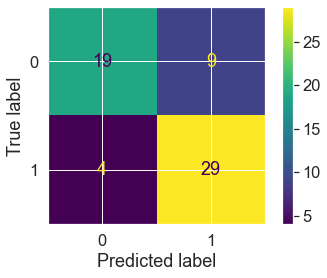

In [103]:
plot_confusion_matrix(gs_log_reg,X_test,y_test)


# Now we have:
* ROC curve
* AUC metric
* Confusion Matrix

# To Do:
* Classification Report
* Cross-validated
* precision
* Recall
* f1 -score



In [104]:
# Classification Report of the TEST SPLIT only
#  THIS IS ONLY DONE ON The x_test and y_preds not the whole model
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



### Calculate accuracy ,recall and f1-score of our model using cross-validation and
to do so we'll be using cross_best_params_



In [147]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [148]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [149]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [151]:
#Mean
cv_acc =np.mean(cv_acc)
cv_acc

0.8479781420765027

In [152]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [153]:
#Mean
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [154]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [155]:
# Mean
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [156]:
## Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [157]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [159]:
# Visualize cross-valifdated metrics
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision": cv_precision,
    "Recall":cv_recall,
    "F1":cv_f1
},index=[0])

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

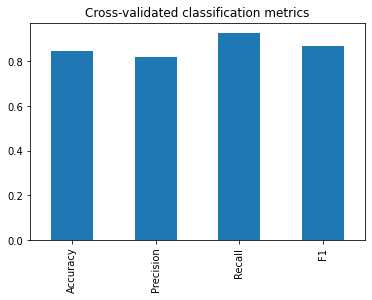

In [161]:
# Plot the cross validated Metrics
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

### Feature Importance

Feature importance is another as asking, "Which features crontributed most to the outcomes of the model and how
how did they contridute"

Finding features impotance is differnt for each machine learning model. One way to find feature 
importance is to search for "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [164]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [165]:
# Check coef_
clf.coef_

array([[ 0.00996796, -0.77190735,  0.78391296, -0.00935455, -0.00663003,
        -0.10016177,  0.28775988,  0.02907216, -0.56746433, -0.48686218,
         0.31940468, -0.47351745, -0.73143454]])

In [167]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.009967955615438112,
 'sex': -0.7719073504307946,
 'cp': 0.7839129628367926,
 'trestbps': -0.009354552733831067,
 'chol': -0.00663002732580028,
 'fbs': -0.10016177346897634,
 'restecg': 0.28775987584056706,
 'thalach': 0.02907216133897869,
 'exang': -0.5674643290669719,
 'oldpeak': -0.4868621764961758,
 'slope': 0.3194046813589503,
 'ca': -0.4735174461327368,
 'thal': -0.7314345371606953}

<AxesSubplot:title={'center':'Feature Importance'}>

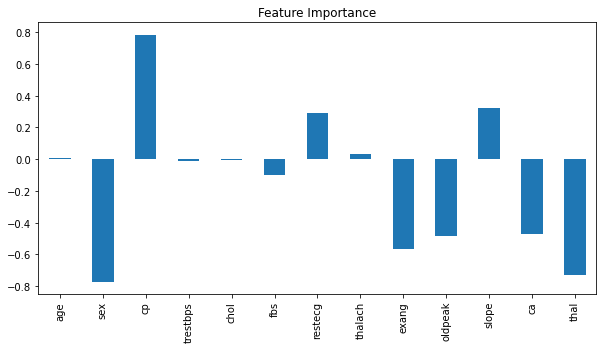

In [169]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False,figsize=(10,5))

In [170]:
# check the sex crosstab with table
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [173]:
# check the slope crosstab with table

pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


11.	slope - the slope of the peak exercise ST segment

•	0: Upsloping: better heart rate with excercise (uncommon)

•	1: Flatsloping: minimal change (typical healthy heart)

•	2: Downslopins: signs of unhealthy heart

### 6. Experimentation

if you haven't hit your evaluation metric yet ... ask yourself...

* Could you collect more data?
* Could you try a better model? Like Catboost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)

* if your model is good enough (you have hit your evaluation metric 
how would you export it and share it with others)